## <span style="color:#f1c232">Environment</span>

In [1]:
#Packages

import random
import eurostat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from Utilities import preptools as pt

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
occupation=pd.DataFrame({
  'isco08': ['OC0', 'OC1', 'OC1-5', 'OC2', 'OC3', 'OC4', 'OC5', 'OC6', 'OC6-8', 'OC7', 'OC7-9', 'OC8', 'OC9','TOTAL'],
  'description': ['Armed forces occupations', 'Managers', 'Non manual workers', 'Professionals', 'Technicians and associate professionals', 'Clerical support workers', 'Service and sales workers', 'Skilled agricultural, forestry and fishery workers', 'Skilled manual workers', 'Craft and related trades workers', 'Manual workers', 'Plant and machine operators and assemblers', 'Elementary occupations','Total']
          })
sector = pd.DataFrame(eurostat.get_dic("LFSA_EISN2","nace_r2", full=False)
                      ,columns=['nace_r2', 'description'])


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Flag Check

For potential problems, it is good to check the data quality prior. Thereby we will import the data including the Flags which are:
 * b = break in time series, c = confidential, d = definition differs, see metadata, e = estimated, f = forecast, n = not significant, p = provisional, r = revised, s = Eurostat estimate, u = low reliability, z = not applicable.

I will check  ***n,p,u*** among these flags for wage and employment data from Eurostat and record it to the data catalog. 

In [ ]:
df.query('f == "s"').groupby(['geo\TIME_PERIOD'])['unit'].count()

geo\TIME_PERIOD
EA12    672
EU15    672
EU25    672
Name: unit, dtype: int64

In [ ]:
50*60*60*10

1800000

 hello 3


## <span style="color:#f1c232">Data Gathering and Preperation</span>

To understand how service outsourcing affects the distribution of labor earnings, we start our analysis by understanding the service trade picture in Europe. In other words, we need to understand which sectors and countries are importing services relatively more. Afterward, we will be able to have suspects to check how the wages are behaving in these sector-country pairs.

### <span style="color:#909a07">**Trade in Services**</span>

In [44]:
trade=pt.trade_getter()
trade

,,,stk_flow,unit,value,flag
code,year,nace_r2,,,,
AT,2013,A_B,EXP,THS_EUR,16173.0,
BE,2013,A_B,EXP,THS_EUR,NaN,:
CZ,2013,A_B,EXP,THS_EUR,18035.0,
DK,2013,A_B,EXP,THS_EUR,215102.0,
EE,2013,A_B,EXP,THS_EUR,6259.0,
...,...,...,...,...,...,...
LU,2019,UNK,IMP,THS_EUR,NaN,:
NL,2019,UNK,IMP,THS_EUR,NaN,:
NO,2019,UNK,IMP,THS_EUR,21375144.0,


In [45]:
trade.reset_index().nace_r2.unique()

array(['A_B', 'C', 'D_E', 'F', 'G', 'H', 'I_L_O-U', 'J', 'K', 'M', 'N',
       'TOTAL', 'UNK'], dtype=object)

In [46]:
trade=trade[(trade.stk_flow=='IMP')].drop(columns=['stk_flow'], axis=1)
trade

,,,unit,value,flag
code,year,nace_r2,,,
AT,2013,A_B,THS_EUR,80303.0,
BE,2013,A_B,THS_EUR,NaN,:
CZ,2013,A_B,THS_EUR,47656.0,
DK,2013,A_B,THS_EUR,753079.0,
EE,2013,A_B,THS_EUR,25356.0,
...,...,...,...,...,...
LU,2019,UNK,THS_EUR,NaN,:
NL,2019,UNK,THS_EUR,NaN,:
NO,2019,UNK,THS_EUR,21375144.0,


In [6]:
eurostat.get_dic('EXT_STEC01','nace_r2', full=False)

[('TOTAL', 'Total - all NACE activities'),
 ('A_B', 'Agriculture, forestry and fishing; mining and quarrying'),
 ('C', 'Manufacturing'),
 ('D_E',
  'Electricity, gas, steam and air conditioning supply; water supply; sewerage, waste management and remediation activities'),
 ('F', 'Construction'),
 ('G', 'Wholesale and retail trade; repair of motor vehicles and motorcycles'),
 ('H', 'Transportation and storage'),
 ('I_L_O-U',
  'Accommodation and food service activities; real estate activities; public administration, defence; compulsory social security; education; human health and social work activities; other services'),
 ('J', 'Information and communication'),
 ('K', 'Financial and insurance activities'),
 ('M', 'Professional, scientific and technical activities'),
 ('N', 'Administrative and support service activities'),
 ('UNK', 'Unknown NACE activity')]

### <span style="color:#909a07">**Output**</span>

In [52]:
output=pt.output_getter()
output

,,,unit,value,flag
code,nace_r2,year,,,
AL,A,2002,CP_MEUR,1015.9,
AT,A,2002,CP_MEUR,3543.4,
BA,A,2002,CP_MEUR,634.4,
BE,A,2002,CP_MEUR,2823.1,
BG,A,2002,CP_MEUR,1697.2,
...,...,...,...,...,...
RO,U,2018,CP_MEUR,0.0,
RS,U,2018,CP_MEUR,NaN,:
SE,U,2018,CP_MEUR,0.0,


In [8]:
output.loc['NL',:,2002]

,unit,value,flag
nace_r2,,,
A,CP_MEUR,10412.0,
A01,CP_MEUR,9969.0,
A02,CP_MEUR,86.0,
A03,CP_MEUR,357.0,
B,CP_MEUR,10576.0,
...,...,...,...
S94,CP_MEUR,2710.0,
S95,CP_MEUR,322.0,
S96,CP_MEUR,2609.0,


In [10]:
df1=output.loc[:,['A','B'],:].groupby(['code','year','unit']).sum().assign(nace_r2='A_B').reset_index().set_index(['code','nace_r2','year'])
df2=output.loc[:,['D','E'],:].groupby(['code','year','unit']).sum().assign(nace_r2='D_E').reset_index().set_index(['code','nace_r2','year'])
df3=output.loc[:,['I','L','O','U'],:].groupby(['code','year','unit']).sum().assign(nace_r2='I_L_O-U').reset_index().set_index(['code','nace_r2','year'])
output=pd.concat([output,df1,df2,df3])
output=output.loc[:,['A_B', 'C', 'D_E', 'F', 'G', 'H', 'I_L_O-U', 'J', 'K', 'M', 'N','TOTAL'],:]
#df4.loc['CZ',2002,['A_B','D_E','I_L_O-U']]
del df1, df2, df3

In [11]:
output.reset_index().nace_r2.unique()

array(['A_B', 'C', 'D_E', 'F', 'G', 'H', 'I_L_O-U', 'J', 'K', 'M', 'N',
       'TOTAL'], dtype=object)

In [12]:
output

unit      value flag
code nace_r2 year                                
AL   A_B     2002  CP_MEURCP_MEUR     1054.6     
             2003  CP_MEURCP_MEUR     1117.3     
             2004  CP_MEURCP_MEUR     1235.5     
             2005  CP_MEURCP_MEUR     1310.5     
             2006  CP_MEURCP_MEUR     1347.9     
...                           ...        ...  ...
SE   TOTAL   2018         CP_MEUR   417117.7     
SI   TOTAL   2018         CP_MEUR    39961.4     
SK   TOTAL   2018         CP_MEUR    80517.3     
TR   TOTAL   2018         CP_MEUR   590360.2     
UK   TOTAL   2018         CP_MEUR  2159178.7     

[8976 rows x 3 columns]

## <span style="color:#f1c232">Data Analysis</span>

Before carrying on the analysis of earning inequality among different occupations it would be practical to provide some theoretical foundation that will be complementary to this Analysis.
</br>

The framework (or model) that this research aims is to describe the patterns in the distribution of earnings among different types of labor employed in the economy. Different rationales have been proposed and examined by the economist _(refer _to _Literature__ Review)_ to explain the wage differences among different employees and the change in this inequality. Though in this research I will be focusing on two factors namely: **skill-biased-technical-change** and **Offshoring**. Surely both parts of the study will be analyzing both of these factors. Though, while the theoretical part of this thesis will relatively focus more on technical change and task-technology structure leading to the  *(occupations)* wage disparity, offshoring will be under the spotlight in the descriptive studies. 

Moreover, since the analysis *(and the theory as well)* is focusing mainly on human *(labor)* activity, it is quite beneficial *(simple)* to approach the production process *(function)* in the economy as an aggregation of human activity *(Tasks)*. This is an important perspective that will affect the course of this descriptive study as well. since the theory is founded on the task, it will be more convenient to study the service trade as an empirical reflection of trade in tasks. Even though trade in tasks is hidden in the trade of goods as well, for practical reasons and the scope of this study, the descriptive analysis will be focusing on trade in services.

Lastly employment-wages-





For this analysis document, no further theoretical explanation is required.
</br>






In the data analysis part we will start by doing two simple descriptive analyses on:

1. Employment and wages
2. Search for the effect of Offshoring
3. Search for the effect of SBTC

### <span style="color:#909a07">**Employment**</span>

Since the analysis is mainly about the labor activities in the economy, it would be proper and virtuous to initiate the analysis by understanding the demographics of occupations in different countries and sectors. 
As mentioned in the literature on the labor market and earning inequalities had relied on definitions of different skill characteristics for the labor force (low, middle and high skills or a continuum of skills) and, more recently, definitions of different task characteristics in the production process such as routine, manual and abstract tasks. 
However, the analysis that we will be examining in this research will be focusing on occupation as the characteristic to evaluate. This focus of ours emerges a need to relate the tasks and skills structure that had been applied with the concept of occupation in our analysis.
To get a simple and theoretically applicable insight into the occupational earning patterns in Europe we will need to check some descriptive statistics answering the following questions:
* What are the percentages of different occupations in each sector?
* Can those occupations employed in the sectors be clustered in formerly mentioned classification categories?
* What are the trends in the occupational labor supply Aggregately in Europe in the last 20 years?
* Which sectors share a common occupation are they paying similar wages, what can be the theoretical understanding that can be derived from this wage (dis)parity? 



In [3]:

emp=pt.lsupply_getter()
emp

,,,isco08,unit,value,flag
code,nace_r2,year,,,,
CH,A,2008,NRP,THS_PER,NaN,: bu
DE,A,2008,NRP,THS_PER,NaN,: bu
DK,A,2008,NRP,THS_PER,NaN,:
EA20,A,2008,NRP,THS_PER,NaN,: bu
EU27_2020,A,2008,NRP,THS_PER,NaN,: bu
...,...,...,...,...,...,...
SE,U,2022,TOTAL,THS_PER,NaN,: u
SI,U,2022,TOTAL,THS_PER,NaN,: u
SK,U,2022,TOTAL,THS_PER,NaN,: u


In [7]:
emp.loc['EU27_2020',:,:].reset_index().year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022])

### Occupational Distribution


We will remove NRP,OC0, TOTAL

In [41]:
try:
    del df,fig
except:
    pass

In [42]:
df=emp.loc['EU27_2020',:,2022]
df=df[~(df['isco08'].isin(['OC0','NRP','TOTAL']))].reset_index()
df=df[~(df['nace_r2'].isin(['NRP']))]
#.drop(['code','year'], axis=1)

df['perc'] = 100 * df['value'] / df.groupby('nace_r2')['value'].transform('sum')
#df=df.set_index('isco08')
df
#df.reset_index().set_index([])

,nace_r2,isco08,unit,value,flag,perc
0,A,OC1,THS_PER,122.70,,1.82
1,A,OC2,THS_PER,138.60,,2.05
2,A,OC3,THS_PER,189.60,,2.81
3,A,OC4,THS_PER,143.30,,2.12
4,A,OC5,THS_PER,115.10,,1.70
...,...,...,...,...,...,...
202,U,OC5,THS_PER,NaN,: u,NaN
203,U,OC6,THS_PER,NaN,: u,NaN
204,U,OC7,THS_PER,NaN,: u,NaN
205,U,OC8,THS_PER,NaN,: u,NaN


In [43]:
df.pivot(index='isco08', columns='nace_r2', values='perc')

nace_r2,A,B,C,D,E,F,G,H,I,J,...,M,N,O,P,Q,R,S,T,TOTAL,U
isco08,,,,,,,,,,,,,,,,,,,,,
OC1,1.82,4.47,4.79,6.06,4.70,5.99,6.99,4.24,11.53,7.55,...,5.58,4.92,4.94,3.00,2.20,7.00,4.67,NaN,5.18,10.55
OC2,2.05,12.07,12.10,25.77,8.27,5.47,7.87,5.30,1.70,57.42,...,53.95,7.57,23.97,70.99,31.84,29.68,16.12,NaN,22.19,52.00
OC3,2.81,13.54,15.20,25.36,16.64,10.53,12.55,8.91,4.44,21.82,...,23.82,10.30,24.64,6.46,29.25,27.48,11.24,0.86,16.24,21.72
OC4,2.12,6.92,8.59,14.41,11.95,5.90,10.25,22.17,5.61,7.49,...,11.60,14.54,20.57,4.66,5.77,13.04,8.82,NaN,10.21,15.72
OC5,1.70,NaN,2.44,1.69,1.67,0.62,41.58,3.87,56.71,1.79,...,1.35,17.86,16.17,8.82,22.48,12.55,41.36,35.83,15.69,NaN
OC6,65.83,NaN,0.15,NaN,NaN,0.14,0.21,NaN,0.23,NaN,...,0.14,5.91,0.87,NaN,0.13,1.09,0.70,1.51,2.80,NaN
OC7,1.83,19.01,29.60,20.79,11.07,57.02,9.67,3.80,1.65,2.61,...,2.07,4.46,2.10,0.59,0.73,3.07,7.51,NaN,11.64,NaN
OC8,4.89,39.26,20.76,3.98,20.62,6.52,3.89,42.87,1.67,0.36,...,0.57,3.07,1.21,0.19,1.15,0.54,4.00,NaN,7.77,NaN
OC9,16.95,4.73,6.37,1.93,25.08,7.81,6.99,8.85,16.46,0.96,...,0.92,31.37,5.52,5.28,6.44,5.56,5.58,61.80,8.29,NaN


In [44]:
fig = go.Figure(data=[go.Scatter(
    x=df.dropna()['nace_r2'], y=df.dropna()['isco08'],
    text=df.dropna()['perc'].astype(int),
    mode='markers',
    #marker_size=np.array(df.dropna()['perc'])
    marker=dict(
    color=['#7FFFD4' if val is False else '#DC143C' for val in df.dropna()['perc']<25],
    size=np.array(df.dropna()['perc']),
    showscale=False
    )
    )
])

fig.show()

Exclude: A,M,O,P,S,T,U

In [45]:
sector

,nace_r2,description
0,TOTAL,Total - all NACE activities
1,A,"Agriculture, forestry and fishing"
2,B,Mining and quarrying
3,C,Manufacturing
4,D,"Electricity, gas, steam and air conditioning s..."
5,E,"Water supply; sewerage, waste management and r..."
6,F,Construction
7,G,Wholesale and retail trade; repair of motor ve...
8,H,Transportation and storage
9,I,Accommodation and food service activities


In [ ]:
occupation

,isco08,description
0,OC0,Armed forces occupations
1,OC1,Managers
2,OC1-5,Non manual workers
3,OC2,Professionals
4,OC3,Technicians and associate professionals
5,OC4,Clerical support workers
6,OC5,Service and sales workers
7,OC6,"Skilled agricultural, forestry and fishery wor..."
8,OC6-8,Skilled manual workers
9,OC7,Craft and related trades workers


In [ ]:
'OC1','OC2','OC3','OC4'-->Abstract Occupations
,'OC2','OC3'-->Abstract Occupations

## Q2

In [ ]:
Avrupada hangi ülkeler de relstive skill endowement  A,M,O,P,S,T,U

In [60]:
df=df[~(df['nace_r2'].isin(['A','M','O','P','S','T','U','TOTAL']))].sort_values(['isco08'])

In [61]:
fig = go.Figure(data=[go.Scatter(
    x=df.dropna()['nace_r2'], y=df.dropna()['isco08'],
    text=df.dropna()['perc'].astype(int),
    mode='markers',
    #marker_size=np.array(df.dropna()['perc'])
    marker=dict(
    color=['#7FFFD4' if val is False else '#DC143C' for val in df.dropna()['perc']<25],
    size=np.array(df.dropna()['perc']),
    showscale=False
    )
    )
])

fig.show()

In [20]:
try:
    del df,fig
except:
    pass

In [26]:
df=emp.loc[:,:,2022]
df=df[~(df['isco08'].isin(['OC0','NRP','TOTAL']))].reset_index()
df=df[~(df['nace_r2'].isin(['NRP','A','M','O','P','S','T','U','TOTAL']))]

df['perc'] = 100 * df['value'] / df.groupby('nace_r2')['value'].transform('sum')
df=df.set_index('isco08')
#df=df.set_index(['code',)
df


,code,nace_r2,unit,value,flag,perc
isco08,,,,,,
OC1,AT,B,THS_PER,NaN,: u,NaN
OC1,BE,B,THS_PER,NaN,: u,NaN
OC1,BG,B,THS_PER,NaN,: u,NaN
OC1,CH,B,THS_PER,NaN,: u,NaN
OC1,CY,B,THS_PER,NaN,: u,NaN
...,...,...,...,...,...,...
OC9,SE,R,THS_PER,3.60,u,0.04
OC9,SI,R,THS_PER,NaN,: u,NaN
OC9,SK,R,THS_PER,NaN,: u,NaN


In [37]:
x=df.loc[['OC1','OC2']].groupby(['code','unit'])['value'].sum()#.assign(nace_r2='A_B').reset_index().set_index(['code','nace_r2','year'])
x
# df=pd.concat([emp,df1,df2,df3])
# df=df.loc[:,['A_B', 'C', 'D_E', 'F', 'G', 'H', 'I_L_O-U', 'J', 'K', 'M', 'N','TOTAL'],:]
# #df4.loc['CZ',2002,['A_B','D_E','I_L_O-U']]
# del df1, df2, df3

code       unit   
AT         THS_PER      698.10
BE         THS_PER      907.90
BG         THS_PER      398.60
CH         THS_PER      794.80
CY         THS_PER       56.40
CZ         THS_PER      697.40
DE         THS_PER    6,288.50
DK         THS_PER      510.90
EA20       THS_PER   22,855.20
EE         THS_PER      119.10
EL         THS_PER      457.70
ES         THS_PER    2,421.30
EU27_2020  THS_PER   29,804.20
FI         THS_PER      404.90
FR         THS_PER    4,954.10
HR         THS_PER      182.00
HU         THS_PER      546.80
IE         THS_PER      558.60
IS         THS_PER       40.50
IT         THS_PER    1,941.40
LT         THS_PER      317.70
LU         THS_PER       68.20
LV         THS_PER      139.80
ME         THS_PER        0.00
MK         THS_PER        0.00
MT         THS_PER       55.90
NL         THS_PER    1,932.50
NO         THS_PER      570.30
PL         THS_PER    2,721.30
PT         THS_PER      803.60
RO         THS_PER    1,002.30
RS         THS_PER  

In [299]:
fig = go.Figure(data=[go.Scatter(
    x=df.dropna()['code'], y=df.dropna()['isco08'],
    text=df.dropna()['perc'].astype(int),
    mode='markers',
    #marker_size=np.array(df.dropna()['perc'])
    marker=dict(
    color=['#7FFFD4' if val is False else '#DC143C' for val in df.dropna()['perc']<15],
    size=np.array(df.dropna()['perc']),
    showscale=False
    )
    )
])

fig.show()

In [248]:
emp

,,,isco08,unit,value,flag
code,nace_r2,year,,,,
CH,A,2008,NRP,THS_PER,NaN,: bu
DE,A,2008,NRP,THS_PER,NaN,: bu
DK,A,2008,NRP,THS_PER,NaN,:
EA20,A,2008,NRP,THS_PER,NaN,: bu
EU27_2020,A,2008,NRP,THS_PER,NaN,: bu
...,...,...,...,...,...,...
SE,U,2022,TOTAL,THS_PER,NaN,: u
SI,U,2022,TOTAL,THS_PER,NaN,: u
SK,U,2022,TOTAL,THS_PER,NaN,: u


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [234]:
d=pd.DataFrame(eurostat.get_dic("LFSA_EISN2","isco08", full=True),
            columns=['Code', 'Occupation'])
d[d['Code'].str.contains('-')]


,Code,Occupation
1,OC1-5,Non manual workers
2,OC1-3,"Managers, professionals, technicians and assoc..."
398,OC6-8,Skilled manual workers
431,OC7-9,Manual workers


In [ ]:
df1=emp.loc[:,['A','B'],:].groupby(['code','year','isco08','unit']).sum().assign(nace_r2='A_B').reset_index().set_index(['code','nace_r2','year'])
df2=emp.loc[:,['D','E'],:].groupby(['code','year','isco08','unit']).sum().assign(nace_r2='D_E').reset_index().set_index(['code','nace_r2','year'])
df3=emp.loc[:,['I','L','O','U'],:].groupby(['code','year','isco08','unit']).sum().assign(nace_r2='I_L_O-U').reset_index().set_index(['code','nace_r2','year'])
emp=pd.concat([emp,df1,df2,df3])
emp=emp.loc[:,['A_B', 'C', 'D_E', 'F', 'G', 'H', 'I_L_O-U', 'J', 'K', 'M', 'N','TOTAL'],:]
#df4.loc['CZ',2002,['A_B','D_E','I_L_O-U']]
del df1, df2, df3

In [ ]:
#Hold for now
print(emp.loc['UK','A_B',2012])
print(emp.loc['UK','A_B',2012].groupby(['code','nace_r2','year','unit'])['value'].sum().unstack())

                  isco08     unit  value  flag
code nace_r2 year                             
UK   A_B     2012    NRP  THS_PER    0.0    ::
             2012    OC0  THS_PER    0.0     :
             2012    OC1  THS_PER   41.0      
             2012    OC2  THS_PER   39.6     u
             2012    OC3  THS_PER   32.0      
             2012    OC4  THS_PER   17.8     u
             2012    OC5  THS_PER    9.0  u: u
             2012    OC6  THS_PER  128.0     :
             2012    OC7  THS_PER   27.4     u
             2012    OC8  THS_PER   35.9      
             2012    OC9  THS_PER   68.9   : u
             2012  TOTAL  THS_PER  403.5      
unit               THS_PER
code nace_r2 year         
UK   A_B     2012    803.1


/var/folders/zp/btn0mxqs6p5gkc_pr91hcp2m0000gn/T/ipykernel_88153/519166850.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(emp.loc['UK','A_B',2012])
/var/folders/zp/btn0mxqs6p5gkc_pr91hcp2m0000gn/T/ipykernel_88153/519166850.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(emp.loc['UK','A_B',2012].groupby(['code','nace_r2','year','unit'])['value'].sum().unstack())


In [ ]:
d1=trade.merge(output,on=['code','year','nace_r2'],how='left')
d1=d1[(d1.value_x>=0)&(d1.value_y>=0)]

d1['PercTrade']=d1['value_x']/(d1['value_y']*1000)
d1=d1.drop(['stk_flow','unit_x','value_x','flag_x','value_y','flag_y','unit_y'], axis=1)
d1.groupby('nace_r2').sum().PercTrade.sort_values(ascending=False)

nace_r2
J          40.555101
H          29.521706
K          26.595044
TOTAL      19.168087
M          14.678127
G          14.520138
C          14.290766
N          13.654308
D_E         3.540050
A_B         1.737499
F           1.391913
I_L_O-U     0.841022
Name: PercTrade, dtype: float64

In [ ]:
d1.loc[','TOTAL',:]

stk_flow   unit_x      value_x flag_x   unit_y   value_y flag_y
year nace_r2                                                                
2013 A_B          IMP  THS_EUR    1732485.0             NaN       NaN    NaN
     C            IMP  THS_EUR   16256152.0         CP_MEUR   67949.0       
     D_E          IMP  THS_EUR    1150524.0             NaN       NaN    NaN
     F            IMP  THS_EUR    1520821.0         CP_MEUR   25632.0       
     G            IMP  THS_EUR   14924664.0         CP_MEUR   78883.0       
...               ...      ...          ...    ...      ...       ...    ...
2018 K            IMP  THS_EUR    7110509.0         CP_MEUR   46456.0       
     M            IMP  THS_EUR   29708345.0         CP_MEUR   56102.0       
     N            IMP  THS_EUR   12717688.0         CP_MEUR   49770.0       
     TOTAL        IMP  THS_EUR  219731305.0         CP_MEUR  692632.0       
     UNK          IMP  THS_EUR   69427476.0             NaN       NaN    NaN

[78 rows x 7 columns]

### <span style="color:#909a07">**Wages**</span>

In [2]:
w=pt.wage_getter()
w

,,,unit,isco08,value,flag
code,nace_r2,year,,,,
NO,B,2006,EUR,OC0,0.00,: c
AT,B,2006,EUR,OC1,39.45,
BE,B,2006,EUR,OC1,30.14,
BG,B,2006,EUR,OC1,2.44,
CY,B,2006,EUR,OC1,23.55,
...,...,...,...,...,...,...
SE,S,2018,PPS,TOTAL,15.88,
SI,S,2018,PPS,TOTAL,9.87,
SK,S,2018,PPS,TOTAL,5.95,


In [3]:
w.reset_index().code.unique()

array(['NO', 'AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EA13', 'EA16',
       'EE', 'EL', 'ES', 'EU15', 'EU25', 'EU27_2007', 'FI', 'FR', 'HU',
       'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE',
       'SI', 'SK', 'TR', 'UK', 'IS', 'EA17', 'EU28', 'HR', 'CH', 'MK',
       'EA18', 'EA19', 'ME', 'RS', 'EU27_2020', 'AL'], dtype=object)

In [4]:
w.reset_index().nace_r2.unique()

array(['B', '', 'C', 'E', 'F', 'G', 'I', 'J', 'K', 'N', 'O', 'P', 'Q',
       'S', 'B-E', 'B-F', 'B-N', 'B-S', 'B-S_X_O', 'G-J', 'G-S',
       'G-S_X_O', 'H', 'O-S', 'P-S', 'R', 'D', 'K-N', 'L', 'M'],
      dtype=object)

In [59]:
len(wt.reset_index().pivot(index='year',columns='isco08').columns)

14

/var/folders/zp/btn0mxqs6p5gkc_pr91hcp2m0000gn/T/ipykernel_91506/3227119069.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  wt=w.loc['EU27_2007','D',]


<Axes: xlabel='year'>

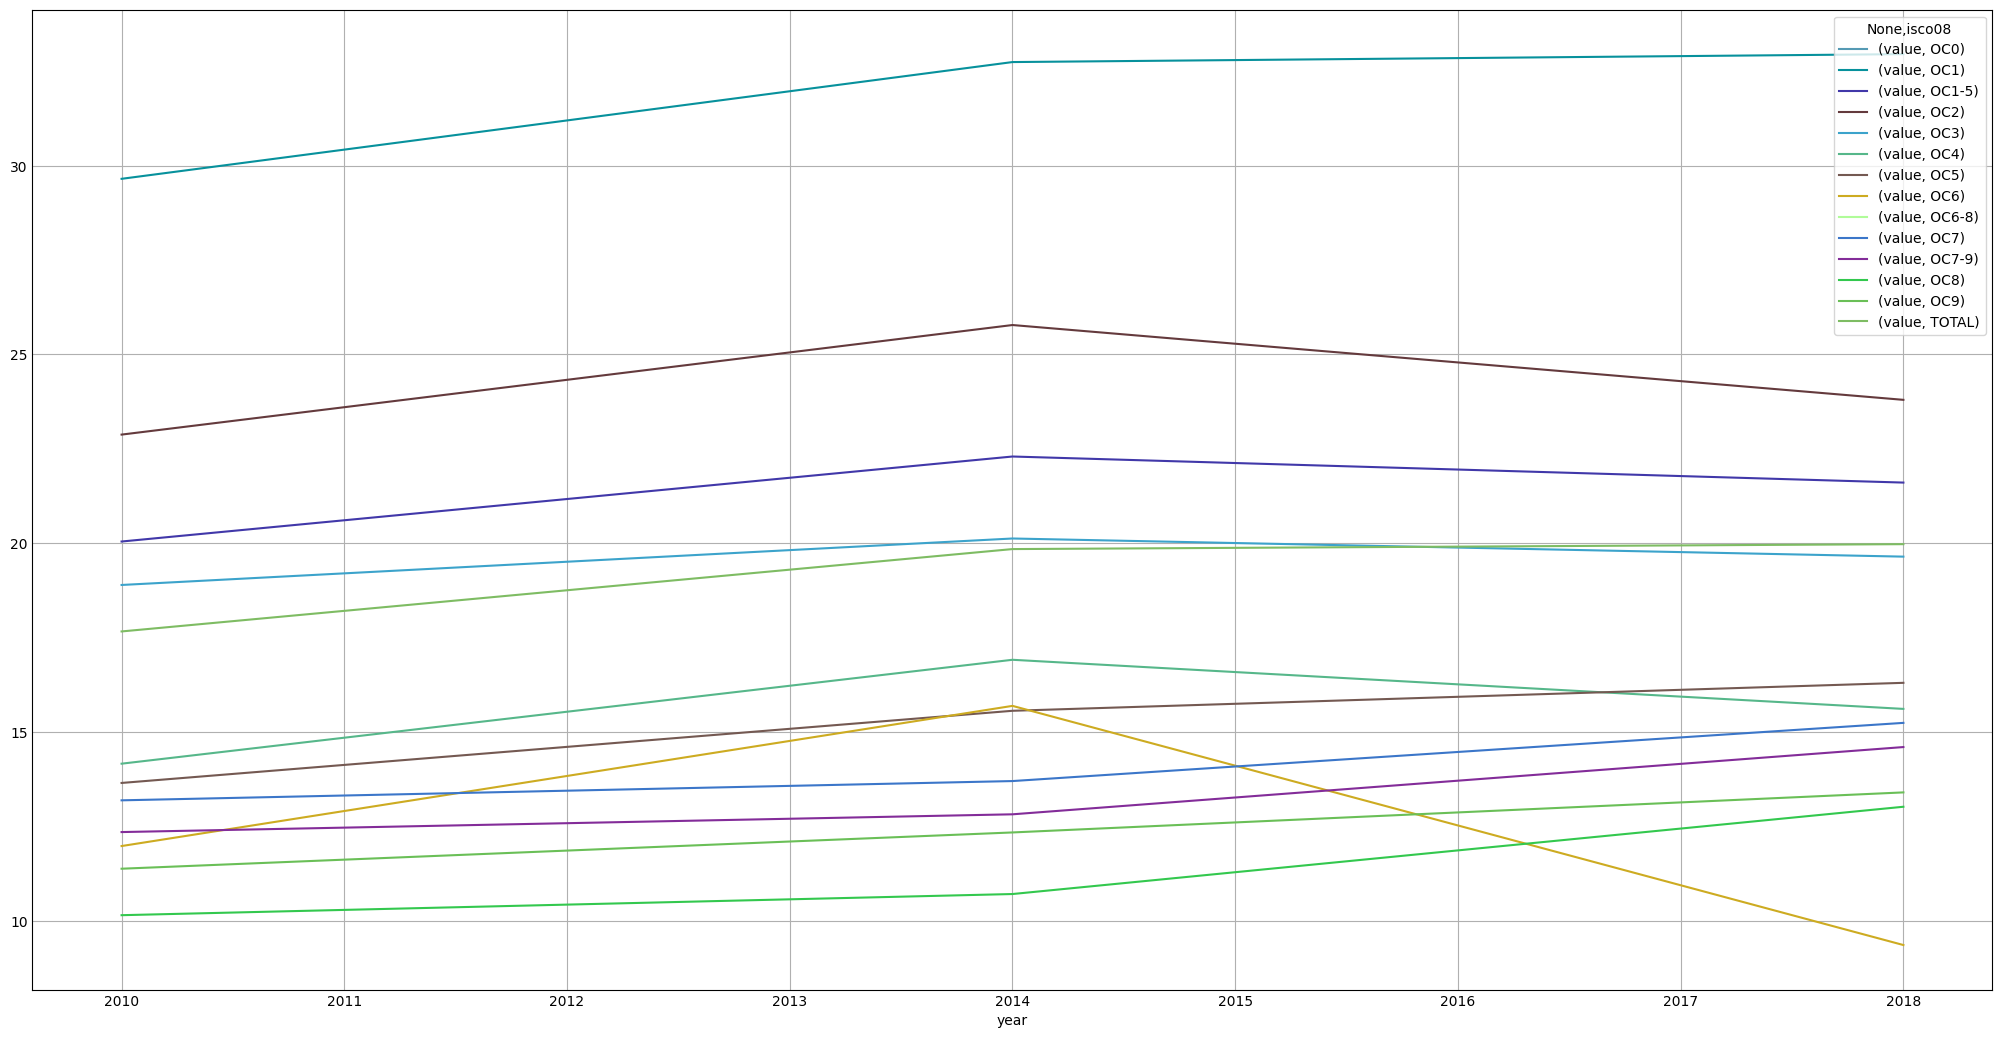

In [64]:
import random
wt=w.loc['EU27_2007','D',[20]]
wt=wt[(wt['unit']=='PPS')].drop(columns=['unit','flag'])
wt.reset_index().pivot(index='year',columns='isco08').plot(figsize=(20,10),
                                                           color = [f"#{random.randint(0,255):02x}{random.randint(0,255):02x}{random.randint(0,255):02x}" for _ in range(
                                                               len(wt.reset_index().pivot(index='year',columns='isco08').columns)
                                                           )]
)

#df.plot.line(y=wt.isco08.unique(), figsize=(10,6))
#plt.show()


### <span style="color:#909a07">**Offshoring**</span>

To understand how offshoring and distribution of earnings among different occupations the Analysis will be conducted at the country level. In other words, we will be checking the Aggregated sectoral earning (*nace_r2 == 'TOTAL'*) and aggregated offshoring data (*nace_r2 == 'TOTAL'*).
</br>
The first thing to check will be the variation among the occupational wages in 